In [1]:
import psycopg2
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
from pprint import pprint

# display a useful amount of rows
pd.set_option('display.max_rows', 312)

# functions for working with DB taken from provided materials with some minor modifications
def pgconnect():
    YOUR_UNIKEY = '########' # REMOVED 
    YOUR_PW     = '########'
    try: 
        conn = psycopg2.connect(host='soit-db-pro-2.ucc.usyd.edu.au',
                               database='y18s1d2001_'+YOUR_UNIKEY,
                               user='y18s1d2001_'+YOUR_UNIKEY, 
                               password=YOUR_PW)
        
        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
    return conn

def pgexec( conn, sqlcmd, args, msg, silent=False ):
   """ utility function to execute some SQL statement
       can take optional arguments to fill in (dictionary)
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval           

def pgquery( conn, sqlcmd, args, silent=False ):
   """ utility function to execute some SQL query statement
       can take optional arguments to fill in (dictionary)
       will print out on screen the result set of the query
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
                cur.execute(sqlcmd)
            else:
                cur.execute(sqlcmd, args)
                for record in cur:
                    args[record[0]] = record[1:]
            if silent == False:
                for record in cur:
                    print(record)
            retval = True
         except Exception as e:
            if silent == False:
                print("db read error: ")
                print(e)
   return retval

# function to convert empty string values in the data to python None values
def empty_to_none(data):
    for row in data:
        for key in row.keys():
            if not row[key]:
                row[key] = None    

# function to check if a point lies between a northeast/southwest pt
# 0 = lat, 1 = lng
def contains(northeast_pt, southwest_pt, pt):
    if not (pt[0] <= northeast_pt['lat'] and pt[0] >=  southwest_pt['lat']):
        return False
    if not (pt[1] <= northeast_pt['lng'] and pt[1] >=  southwest_pt['lng']):
        return False
    else:
        return True

In [2]:
# connect to database & build schema
conn = pgconnect()
pgexec(conn, open("walkability.sql", "r").read(), None, 'Create tables')

connected
success: Create tables


True

In [3]:
# read CSVs into dict of dicts
stats = {
    'statistical_areas': list(csv.DictReader(open('./StatisticalAreas.csv'))),
    'neighbourhoods': list(csv.DictReader(open('./Neighbourhoods.csv'))),
    'census_stats': list(csv.DictReader(open('./CensusStats.csv'))),
    'business_stats': list(csv.DictReader(open('./BusinessStats.csv'))),
    'car_sharing_pods': list(csv.DictReader(open('./CarSharingPods.csv')))
}

In [4]:
# clean the data: turn empty strings into None, psycopg will insert None as SQL NULL
for key in stats.keys():
    empty_to_none(stats[key])

In [5]:
# copy csv files into SQLtables
insert_stmt = """INSERT INTO statistical_areas (area_id, area_name, parent_area_id)
VALUES (%(area_id)s, %(area_name)s, %(parent_area_id)s)"""
for row in stats['statistical_areas']:
    pgexec(conn, insert_stmt, row, "row inserted")

insert_stmt = """INSERT INTO neighbourhoods 
    (area_id, area_name, land_area, population, number_of_dwellings,number_of_businesses)
    VALUES (%(area_id)s, %(area_name)s, %(land_area)s, %(population)s,
    %(number_of_dwellings)s, %(number_of_businesses)s)"""
for row in stats['neighbourhoods']:
    pgexec(conn, insert_stmt, row, "row inserted") 

insert_stmt = """INSERT INTO census_stats (area_id, median_annual_household_income, avg_monthly_rent)
    VALUES (%(area_id)s, %(median_annual_household_income)s, %(avg_monthly_rent)s)"""
for row in stats['census_stats']:
    pgexec(conn, insert_stmt, row, "row inserted")

insert_stmt = """INSERT INTO car_sharing_pods (pod_id, name, num_cars, latitude, longitude)
    VALUES (%(pod_id)s, %(name)s, %(num_cars)s, %(latitude)s, %(longitude)s)"""
for row in stats['car_sharing_pods']:
    pgexec(conn, insert_stmt, row, "row inserted") 
    
insert_stmt = """INSERT INTO business_stats (area_id, num_businesses, retail_trade,
    accommodation_and_food_services, health_care_and_social_assistance, education_and_training,
    arts_and_recreation_services)
    VALUES (%(area_id)s, %(num_businesses)s, %(retail_trade)s, %(accommodation_and_food_services)s,
    %(health_care_and_social_assistance)s, %(education_and_training)s, %(arts_and_recreation_services)s)"""
for row in stats['business_stats']:
    pgexec(conn, insert_stmt, row, "row inserted") 

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

In [6]:
# clean data: delete rows from statistical areas outside the Sydney neighbourhoods we are interested in
stmnt = """DELETE FROM statistical_areas
WHERE area_id NOT IN (
    SELECT area_id
    FROM neighbourhoods
)"""
pgexec(conn, stmnt, row, "row deleted")

# test that it works, there should be 312 rows in statistical areas now
stment = "select * from statistical_areas"
out = {}
pgquery(conn, stment, out, silent=False)
print(len(out))     

success: row deleted
312


In [7]:
# read in extra transport hub json dataset for augmenting neighbourhoods with number of transport hubs
with open('transport_hub_data.json') as f1:
    transport = json.load(f1)
# pprint(transport)

    
# read in geodata with latitude and longitude for the area of each neighbourhood (from google api)
with open('geodata.json') as f:
    geodata = json.load(f)
# pprint(geodata)

In [8]:
# get lat, long from car sharing pods
stment = "select pod_id, latitude, longitude from car_sharing_pods"
pod_pts = {}
pgquery(conn, stment, pod_pts, silent=False)

# get neighbourhoods with area_ids to match against google API areas
stment = "select area_name, area_id from neighbourhoods"
neighbourhoods = {}
pgquery(conn, stment,neighbourhoods, silent=False)

# prepare SQL statements for updating DB
car_pods_stmnt = """UPDATE car_sharing_pods SET area_id = %s WHERE pod_id = %s"""
neighbourhoods_stmnt = """UPDATE neighbourhoods SET number_of_car_sharing_pods = %s WHERE area_id = %s"""
transport_stmnt = """UPDATE neighbourhoods SET number_of_public_transport_hubs = %s WHERE area_id = %s"""

# check which neighbourhoods contain which sharing pods and which neighbourhods contain which transport hubs
for area_name, pt in geodata.items():
    northwest = pt['northeast']
    southeast = pt['southwest']
    num_pods = 0
    num_hubs = 0
    for key, pt in pod_pts.items():
        if contains(northwest, southeast, pt): 
        # update the area_id field for each car pod
            print('sharing pod {} INSIDE {}'.format(key, area_name))
            pgexec(conn, car_pods_stmnt, [neighbourhoods[area_name], key], "updated pod area_id")
            num_pods += 1
    for hub in transport:
        pt = (hub['LATITUDE'], hub['LONGITUDE'])
        if contains(northwest, southeast, pt):
            print('hub {} inside {}'.format(hub['LOCATION_NAME'], area_name))
            num_hubs += 1
            
    # execute update on number_of_car_sharing_pods field for each neighbourhood
    pgexec(conn,
           neighbourhoods_stmnt, 
           [num_pods, neighbourhoods[area_name]], 
           "updated neighbourhood pods = {}".format(num_pods))
    
    # execute update on the number on 
    pgexec(conn,
           transport_stmnt, 
           [num_hubs, neighbourhoods[area_name]], 
           "updated transport hubs = {}".format(num_hubs))

success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Gosford Station inside Gosford - Springfield
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Narara Station inside Narara
hub Niagara Park Station inside Narara
success: updated neighbourhood pods = 0
success: updated transport hubs = 2
hub Niagara Park Station inside Niagara Park - Lisarow
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
hub Koolewong Station inside Point Clare - Koolewong
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
success: up

success: updated pod area_id
sharing pod 78 INSIDE Erskineville - Alexandria
success: updated pod area_id
sharing pod 410 INSIDE Erskineville - Alexandria
success: updated pod area_id
sharing pod 198 INSIDE Erskineville - Alexandria
success: updated pod area_id
hub Erskineville Station inside Erskineville - Alexandria
hub St Peters Station inside Erskineville - Alexandria
success: updated neighbourhood pods = 15
success: updated transport hubs = 2
sharing pod 228 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 149 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 91 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 23 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 10 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 17 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 321 INSIDE Glebe - Forest Lodge
success: updated pod area_id
sharing pod 6 INSIDE Glebe - Forest Lodge

success: updated pod area_id
sharing pod 207 INSIDE Surry Hills
success: updated pod area_id
sharing pod 261 INSIDE Surry Hills
success: updated pod area_id
sharing pod 428 INSIDE Surry Hills
success: updated pod area_id
sharing pod 416 INSIDE Surry Hills
success: updated pod area_id
sharing pod 356 INSIDE Surry Hills
success: updated pod area_id
sharing pod 274 INSIDE Surry Hills
success: updated pod area_id
sharing pod 107 INSIDE Surry Hills
success: updated pod area_id
sharing pod 106 INSIDE Surry Hills
success: updated pod area_id
sharing pod 307 INSIDE Surry Hills
success: updated pod area_id
sharing pod 413 INSIDE Surry Hills
success: updated pod area_id
sharing pod 306 INSIDE Surry Hills
success: updated pod area_id
sharing pod 260 INSIDE Surry Hills
success: updated pod area_id
sharing pod 340 INSIDE Surry Hills
success: updated pod area_id
sharing pod 392 INSIDE Surry Hills
success: updated pod area_id
sharing pod 437 INSIDE Surry Hills
success: updated pod area_id
sharing pod

hub Banksia Station inside Rockdale - Banksia
hub Kogarah Station inside Rockdale - Banksia
hub Rockdale Station inside Rockdale - Banksia
success: updated neighbourhood pods = 0
success: updated transport hubs = 3
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Homebush Station inside Concord West - North Strathfield
hub North Strathfield Station inside Concord West - North Strathfield
success: updated neighbourhood pods = 0
success: updated transport hubs = 2
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
sharing pod 384 INSIDE Balmain
success: updated pod area_id
sharing pod 170 INSIDE Balmain
success: updated pod area_id
sharing pod 335 INSIDE Balmain
success: updated pod area_id
sharing pod 104 INSIDE Balmain
success: updated pod area_id
sharing pod 336 INSIDE Balmain
suc

hub Douglas Park Station inside Douglas Park - Appin
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Blackheath Station inside Blackheath - Megalong Valley
hub Medlow Bath Station inside Blackheath - Megalong Valley
success: updated neighbourhood pods = 0
success: updated transport hubs = 2
hub Lapstone Station inside Blaxland - Warrimoo - Lapstone
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
hub Bell Station inside Blue Mountains - North
hub Blackheath Station inside Blue Mountains - North
hub Blaxland Station inside Blue Mountains - North
hub Bullaburra Station inside Blue Mountains - North
hub Emu Plains Station inside Blue Mountains - North
hub Faulconbridge Station inside Blue Mountains - North
hub Glenbrook Station inside Blue Mountains - North
hub Good Forest Coach St

success: updated transport hubs = 2
hub Caringbah Station inside Caringbah South
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Waterfall Station inside Heathcote - Waterfall
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
success: updated neighbourhood pods = 0
success: updated transport hubs = 0
hub Como Station inside Oyster Bay - Como - Jannali
success: updated neighbourhood pods = 0
success: updated transport hubs = 1
hub Caringbah Station inside Royal National Park
hub Cronulla Station inside Royal National Park
hub Engadine Station inside Royal National Park
hub Heathcote Station inside Royal National Park
hub Loftus Sta

In [9]:
# display neighbourhoods table with new data added
stment = """SELECT * FROM neighbourhoods"""
df = pd.read_sql(stment, conn)
display(df)

,area_id,area_name,land_area,population,number_of_dwellings,number_of_businesses,number_of_car_sharing_pods,number_of_public_transport_hubs
0,116011304,Blacktown (North) - Marayong,738.3,18984.0,4913,867.0,NaN,NaN
1,117011325,Sydney Airport,891.1,202.0,0,9.0,NaN,NaN
2,102011029,Box Head - MacMasters Beach,3208.6,10986.0,3847,907.0,0.0,0.0
3,102011030,Calga - Kulnura,76795.1,4841.0,1575,1102.0,0.0,0.0
4,102011032,Gosford - Springfield,1691.2,19385.0,6373,2126.0,0.0,1.0
5,102011033,Kariong,830.6,6540.0,1824,352.0,0.0,0.0
6,102011034,Kincumber - Picketts Valley,1208.9,7428.0,1946,479.0,0.0,0.0
7,102011035,Narara,770.2,6853.0,2006,292.0,0.0,2.0
8,102011036,Niagara Park - Lisarow,1673.2,8173.0,2345,477.0,0.0,1.0
9,102011038,Saratoga - Davistown,476.8,7177.0,2366,486.0,0.0,0.0


In [10]:
# display car_sharing_pods with area_id field added
stment = "select * from car_sharing_pods"
pods = pd.read_sql(stment, conn)
display(pods)

,pod_id,name,num_cars,latitude,longitude,area_id
0,491,Enmore - London Street,1,-33.896722,151.171199,NaN
1,196,Zetland - Gadigal Avenue,2,-33.906771,151.208358,NaN
2,372,Elizabeth Bay - Ithaca Road,1,-33.872010,151.228669,NaN
3,298,Redfern - Chalmers Street,1,-33.893865,151.205209,NaN
4,303,McMahons Point - Blues Point Reserve,1,-33.848640,151.203749,NaN
5,350,Potts Point - Tusculum Street,1,-33.871203,151.223982,NaN
6,180,Newtown South - Holmwood Street,1,-33.904430,151.178285,NaN
7,126,Potts Point - 116 Victoria Street,1,-33.871500,151.223100,NaN
8,244,Manly - Osborne Road,1,-33.802475,151.287146,NaN
9,22,Newtown North - Hollis Park,1,-33.895000,151.186600,NaN


In [11]:
# calculate population density using data from the neighbourhoods table
stment = "select area_id, population / land_area as population_density from neighbourhoods"
population_density = pd.read_sql(stment, conn)

# calculate dwelling density using data from the neighbourhoods table
stment = "select area_id, number_of_dwellings / land_area as dwelling_density from neighbourhoods"
dwelling_density = pd.read_sql(stment, conn)

# calculate service balance using data from the neighbourhoods table
# service balance = -(standard deviation of number_of_businesses_in_category / known_businesses)
# negative value reflects the fact that higher standard deviation = less balance of services -> less walkable
stment = """SELECT * FROM business_stats"""
df = pd.read_sql(stment, conn)
business_std = []
for row in df.iterrows():
    known = sum(row[1][2:7])
    business_std.append(-np.std([i/known for i in row[1][2:7]]))
df['service_balance'] = business_std
df = df[['area_id', 'service_balance']]

# calculate transport density using data from the neighbourhoods table
stment = "SELECT area_id, number_of_car_sharing_pods / land_area as transport_density FROM neighbourhoods"
transport_density = pd.read_sql(stment, conn)

# calculate public transport density using data from the neighbourhoods table
stment = """SELECT area_id, number_of_public_transport_hubs / land_area as public_transport_density
            FROM neighbourhoods"""
public_transport_density = pd.read_sql(stment, conn)

In [12]:
# merge stats into data frame
merged = pd.merge(left=population_density, right=dwelling_density, left_on="area_id", right_on="area_id")
merged = pd.merge(left=merged, right=df, left_on="area_id", right_on="area_id")
merged = pd.merge(left=merged, right=transport_density, left_on="area_id", right_on="area_id")
merged = pd.merge(left=merged, right=public_transport_density, left_on="area_id", right_on="area_id")

# calculate z-scores and walkability score and add to dataframe
# (with inspiration from:
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html#assigning-new-columns-in-method-chains)
cols = list(merged.columns)
cols.remove('area_id')
for col in cols:
    col_zscore = col + '_z'
    merged[col_zscore] = (merged[col] - merged[col].mean())/merged[col].std(ddof=0)

computed = merged.assign(walkability_score = merged['population_density_z'] + 
                         merged['dwelling_density_z'] +
                         merged['service_balance_z'] +
                         merged['transport_density_z'] +
                         merged['public_transport_density_z'])
display(computed)

,area_id,population_density,dwelling_density,service_balance,transport_density,public_transport_density,population_density_z,dwelling_density_z,service_balance_z,transport_density_z,public_transport_density_z,walkability_score
0,116011304,25.713125,6.654477,-0.134698,NaN,NaN,-0.140171,-0.166147,-0.397537,NaN,NaN,NaN
1,117011325,0.226686,0.000000,NaN,NaN,NaN,-1.113774,-1.007924,NaN,NaN,NaN,NaN
2,102011029,3.423923,1.198965,-0.084043,0.000000,0.000000,-0.991637,-0.856258,1.405778,-0.170468,-0.412811,-1.025396
3,102011030,0.063038,0.020509,-0.095580,0.000000,0.000000,-1.120026,-1.005330,0.995045,-0.170468,-0.412811,-1.713590
4,102011032,11.462275,3.768330,-0.140159,0.000000,0.000591,-0.684565,-0.531238,-0.591968,-0.170468,-0.268678,-2.246918
5,102011033,7.873826,2.196003,-0.083752,0.000000,0.000000,-0.821647,-0.730135,1.416148,-0.170468,-0.412811,-0.718913
6,102011034,6.144429,1.609728,-0.092149,0.000000,0.000000,-0.887712,-0.804297,1.117195,-0.170468,-0.412811,-1.158092
7,102011035,8.897689,2.604518,-0.080750,0.000000,0.002597,-0.782535,-0.678458,1.523010,-0.170468,0.220160,0.111710
8,102011036,4.884652,1.401506,-0.107826,0.000000,0.000598,-0.935836,-0.830637,0.559118,-0.170468,-0.267127,-1.644951
9,102011038,15.052433,4.962248,-0.113775,0.000000,0.000000,-0.547418,-0.380210,0.347326,-0.170468,-0.412811,-1.163581


In [13]:
# store computed measures and scores of each neighbourhood in DB
# prepare SQL statement
insert_stmt = """INSERT INTO neighbourhood_walk_stats VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

for row in computed.itertuples():
    # psycopg cant handle numpy.int64
    converted = [int(row[1])] + list(row[2:])
    pgexec(conn, insert_stmt, converted, "row inserted")


success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

In [14]:
# lets see which neighbourhoods got the best walkability score!
stment = """SELECT
  n.area_id,
  area_name,
  population_density,
  dwelling_density,
  service_balance,
  transport_density,
  public_transport_density,
  walkability_score
FROM neighbourhoods n
  JOIN neighbourhood_walk_stats nws ON n.area_id = nws.area_id
WHERE walkability_score != 'NaN'
ORDER BY walkability_score DESC;"""
walkability = pd.read_sql(stment, conn)
display(walkability)

,area_id,area_name,population_density,dwelling_density,service_balance,transport_density,public_transport_density,walkability_score
0,117031336,Surry Hills,137.264438,38.297872,-0.069109,0.478723,0.030395,28.547339
1,117031334,Pyrmont - Ultimo,161.522468,50.965795,-0.098021,0.087190,0.046948,24.409793
2,117031329,Darlinghurst,144.854142,45.670945,-0.103632,0.466744,0.011669,23.680298
3,117031333,Potts Point - Woolloomooloo,163.187114,59.979438,-0.089923,0.061686,0.006854,15.498558
4,117031335,Redfern - Chippendale,118.067499,33.425798,-0.051124,0.060102,0.009246,12.341247
5,121041416,Neutral Bay - Kirribilli,86.861149,33.007689,-0.090795,0.058797,0.018091,11.807755
6,117031331,Glebe - Forest Lodge,93.796699,22.037359,-0.086061,0.082537,0.013032,10.206741
7,118021569,Randwick - North,93.078512,29.044421,-0.123911,0.108471,0.000000,7.182215
8,118011340,Bondi Beach - North Bondi,93.331979,26.355140,-0.061555,0.000000,0.000000,6.391943
9,121041417,North Sydney - Lavender Bay,61.750261,21.311390,-0.084099,0.041797,0.005225,6.051021


In [15]:
# how many neighbourhoods had insufficient data to calculate walkability?
stment = """SELECT count(*)
FROM neighbourhood_walk_stats
WHERE walkability_score = 'NaN';
"""
no_walkability = pd.read_sql(stment, conn)
display(no_walkability)

,count
0,25


In [20]:
# get data we need for correlation coeffcient calculations
stment = """SELECT
  n.area_id,
  area_name,
  nws.walkability_score,
  median_annual_household_income,
  ((avg_monthly_rent * 12) / 365) * 7 as avg_weekly_rent
FROM neighbourhood_walk_stats nws
  JOIN neighbourhoods n ON nws.area_id = n.area_id
  JOIN census_stats cs ON n.area_id = cs.area_id;
"""
df = pd.read_sql(stment, conn)
display(df)

,area_id,area_name,walkability_score,median_annual_household_income,avg_weekly_rent
0,116011304,Blacktown (North) - Marayong,NaN,45946.0,343.0
1,117011325,Sydney Airport,NaN,NaN,NaN
2,102011029,Box Head - MacMasters Beach,-1.025396,42621.0,385.0
3,102011030,Calga - Kulnura,-1.713590,42105.0,266.0
4,102011032,Gosford - Springfield,-2.246918,45972.0,315.0
5,102011033,Kariong,-0.718913,47896.0,378.0
6,102011034,Kincumber - Picketts Valley,-1.158092,41642.0,315.0
7,102011035,Narara,0.111710,46660.0,343.0
8,102011036,Niagara Park - Lisarow,-1.644951,45762.0,343.0
9,102011038,Saratoga - Davistown,-1.163581,43171.0,378.0


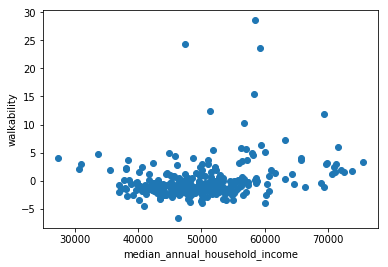

Correlation between median household income and walkability r =  0.242856320642


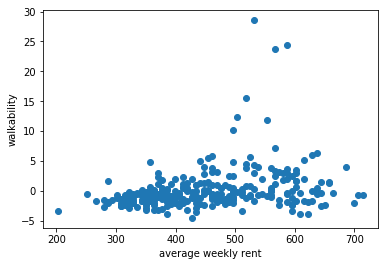

Correlation between average weekly rent and walkability r =  0.301907164895


In [22]:
X = df.median_annual_household_income
Y = df.walkability_score
plt.scatter(X,Y)
plt.xlabel('median_annual_household_income')
plt.ylabel('walkability')
plt.show()

# calculate correlation coeffficient between walkability score and median household income for neighbourhoods
print('Correlation between median household income and walkability r = ',
      df.corr().median_annual_household_income.walkability_score)

X = df.avg_weekly_rent
Y = df.walkability_score
plt.scatter(X,Y)
plt.xlabel('average weekly rent')
plt.ylabel('walkability')
plt.show()

# calculate correlation coefficient between walkability score and average weekly rent for neighbourhoods
print('Correlation between average weekly rent and walkability r = ',
      df.corr().avg_weekly_rent.walkability_score)

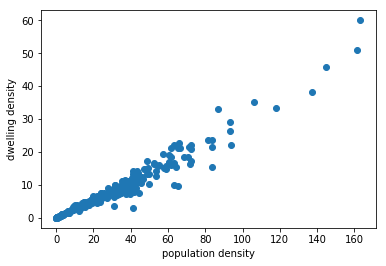

Correlation between population and dwelling density r =  0.970221896712


In [18]:
# Some other interesting questions: does population density predict dwelling density?
X = walkability['population_density']
Y = walkability['dwelling_density']
plt.scatter(X,Y)
plt.xlabel('population density')
plt.ylabel('dwelling density')
plt.show()

# calculate correlation coeffficient between walkability score and median household income for neighbourhoods
print('Correlation between population and dwelling density r = ',
      walkability.corr().population_density.dwelling_density)

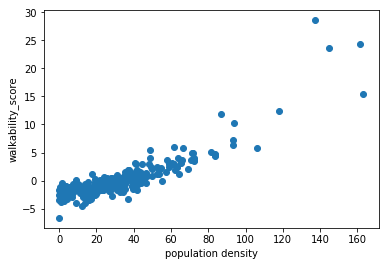

Correlation between population and walkability_score r =  0.869447320697


In [19]:
# since population predicts dwelling density, does it predict walkability score better than other factors?
X = walkability['population_density']
Y = walkability['walkability_score']
plt.scatter(X,Y)
plt.xlabel('population density')
plt.ylabel('walkability_score')
plt.show()

# calculate correlation coeffficient between walkability score and median household income for neighbourhoods
print('Correlation between population and walkability_score r = ',
      walkability.corr().population_density.walkability_score)